In [93]:
!pip install scikit-learn

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [97]:
df=pd.read_csv("titanicml.csv")

In [99]:
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [101]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [103]:
# if 'Age' in df.columns:
#     df['Age'].fillna(df['Age'].mean(), inplace=True)  => no need (chatgpt)
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("\nMissing values after handling:\n",df.isnull().sum())


Missing values after handling:
 PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10176\2296511584.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [105]:
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
df['Embarked']=LabelEncoder().fit_transform(df['Embarked'])

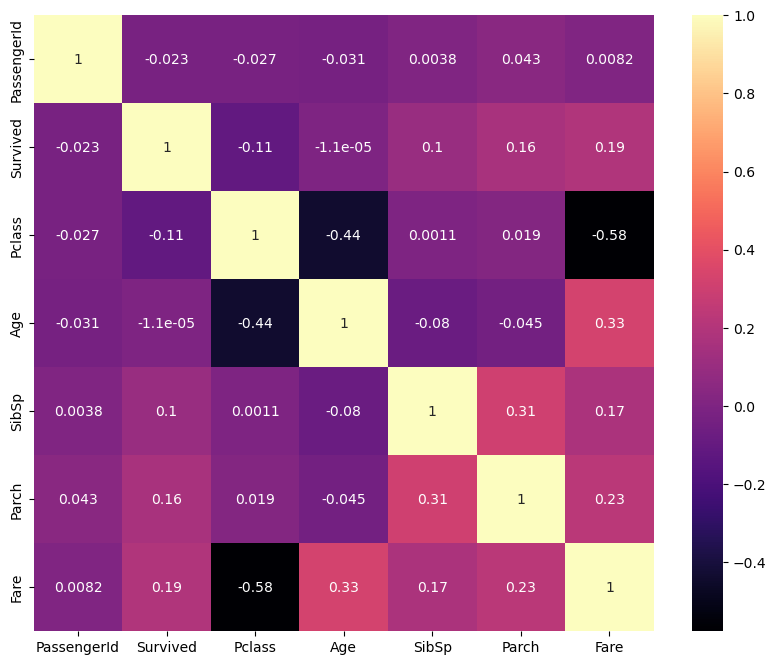

In [107]:
# #drop non-numeric column to avoid errors
# numeric_df=df.select_dtypes(include=['float64','int64'])
# #fill missing values to avoid NaNs in correlation
# numeric_df.fillna(numeric_df.mean(),inplace=True)

#plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='magma') 
#annotation => annot it display numeric values into the heatmap cells , in cmap we can give any colours name eg 'coolwarm','viridis','plasma','Blues','Greens','magma','YlGnBu'
plt.show()

In [109]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [111]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# x_scaled=scaler.fit_transform(x)
# #convert back to dataframe(optional)
# x_scaled_df=pd.DataFrame(x_scaled,columns=x.columns)
# print(x_scaled_df.head())

   PassengerId    Pclass       Sex       Age     SibSp     Parch      Fare  \
0    -1.727912  0.873482  0.755929  0.298549 -0.499470 -0.400248 -0.497811   
1    -1.719625  0.873482 -1.322876  1.181328  0.616992 -0.400248 -0.512660   
2    -1.711337 -0.315819  0.755929  2.240662 -0.499470 -0.400248 -0.464532   
3    -1.703050  0.873482  0.755929 -0.231118 -0.499470 -0.400248 -0.482888   
4    -1.694763  0.873482 -1.322876 -0.584229  0.616992  0.619896 -0.417971   

   Embarked  
0 -0.470915  
1  0.700767  
2 -0.470915  
3  0.700767  
4  0.700767  


In [113]:
#select relevant numeric features for scaling(you can cyustome thia)
features=['Age','Fare','Pclass','SibSp','Parch']
#handle missing values
x=df[features]
x=x.fillna(x.median())

#Standard Scaling

scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)
X_scaled_df=pd.DataFrame(X_scaled,columns=features)
print(X_scaled_df.head())

        Age      Fare    Pclass     SibSp     Parch
0  0.386231 -0.497413  0.873482 -0.499470 -0.400248
1  1.371370 -0.512278  0.873482  0.616992 -0.400248
2  2.553537 -0.464100 -0.315819 -0.499470 -0.400248
3 -0.204852 -0.482475  0.873482 -0.499470 -0.400248
4 -0.598908 -0.417492  0.873482  0.616992  0.619896


In [115]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled_df,y,test_size=0.2,random_state=42)

In [117]:
print(x_train.isnull().sum())  # Count missing values in each column

PassengerId     0
Pclass          0
Sex             0
Age            72
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [119]:
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]  # Ensure labels are also updated

In [121]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Use 'median' or 'most_frequent' if needed
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', LogisticRegression())
])

pipeline.fit(x_train, y_train)  # This will handle missing values automatically


Pipeline(steps=[('imputer', SimpleImputer()), ('model', LogisticRegression())])

In [125]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [127]:
#Predict the testing dataset
y_pred = pipeline.predict(x_test)

In [129]:
print("Predictions:", y_pred[:10])  # Show first 10 predictions

Predictions: [0 1 0 0 1 0 1 0 1 0]


In [131]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [133]:
# this help to check the actual output and predicted output
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))

     Actual  Predicted
321       0          0
324       1          1
388       0          0
56        0          0
153       1          1
30        0          0
72        1          1
82        0          0
258       1          1
416       0          0


In [135]:
!pip install gradio

In [141]:
import gradio as gr
import pandas as pd

def predict_survival(age, fare, pclass, sibsp, parch, sex, embarked):
    # Convert inputs to match training data format
    sex_encoded = 1 if sex == "Male" else 0
    embarked_map = {"S": 2, "C": 0, "Q": 1}
    embarked_encoded = embarked_map[embarked]

    input_data = pd.DataFrame([{
        'Age': age,
        'Fare': fare,
        'Pclass': pclass,
        'SibSp': sibsp,
        'Parch': parch,
        'Sex': sex_encoded,
        'Embarked': embarked_encoded
    }])

    # Use same scaler as training
    input_scaled = scaler.transform(input_data)

    # Predict
    pred = model.predict(input_scaled)[0]
    return "🟢 Survived" if pred == 1 else "🔴 Did Not Survive"


In [143]:
demo = gr.Interface(
    fn=predict_survival,
    inputs=[
        gr.Number(label="Age", value=30),
        gr.Number(label="Fare", value=72.5),
        gr.Dropdown([1, 2, 3], label="Pclass"),
        gr.Number(label="Siblings/Spouse Aboard (SibSp)", value=1),
        gr.Number(label="Parents/Children Aboard (Parch)", value=0),
        gr.Radio(["Male", "Female"], label="Sex"),
        gr.Dropdown(["S", "C", "Q"], label="Port of Embarkation")
    ],
    outputs="text",
    title="🚢 Titanic Survival Predictor",
    description="Enter passenger info to predict survival"
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
